<a href="https://colab.research.google.com/github/anshuraj460016/AI-Lab/blob/main/AI_Assignment-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bi-directional BFS Path: ['A', 'B', 'D', 'F', 'G', 'I']
Standard BFS Path: ['A', 'B', 'D', 'F', 'G', 'I']
DFS Path: ['A', 'B', 'D', 'F', 'E', 'H', 'G', 'I']
Visualizing Bi-directional BFS Path:


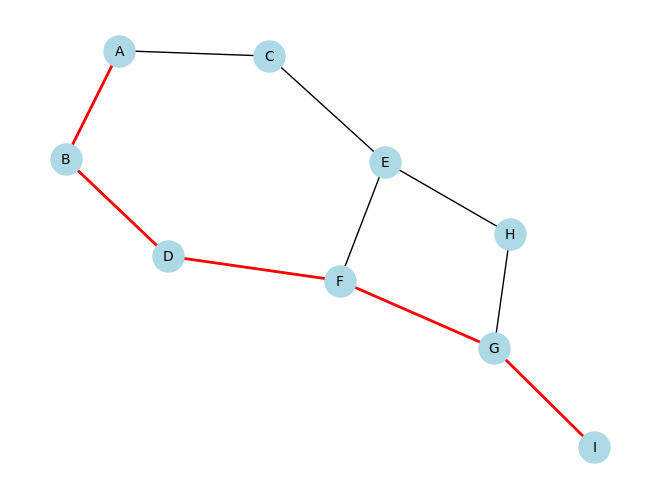

Visualizing Standard BFS Path:


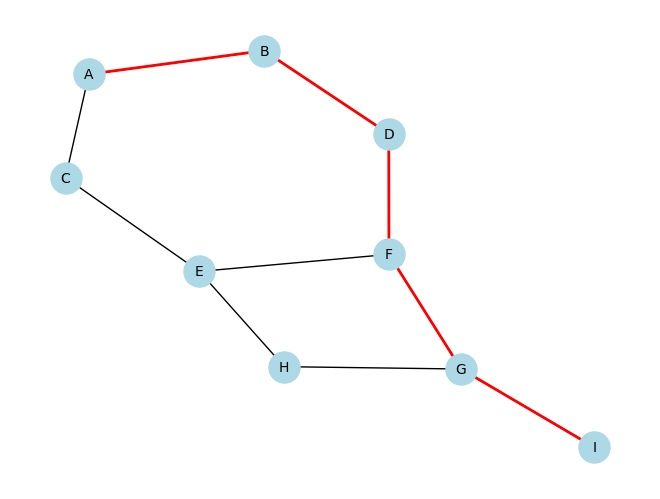

Visualizing DFS Path:


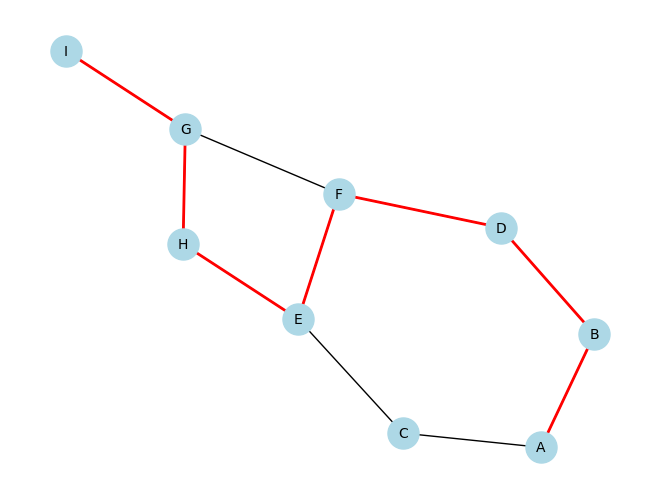

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque


def bidirectional_bfs(graph, start, goal):
    if start == goal:
        return [start]

    front_queue = deque([start])
    back_queue = deque([goal])

    front_visited = {start: None}
    back_visited = {goal: None}

    while front_queue and back_queue:

        if front_queue:
            current = front_queue.popleft()
            for neighbor in graph.neighbors(current):
                if neighbor not in front_visited:
                    front_visited[neighbor] = current
                    front_queue.append(neighbor)
                if neighbor in back_visited:
                    return reconstruct_path(front_visited, back_visited, neighbor)


        if back_queue:
            current = back_queue.popleft()
            for neighbor in graph.neighbors(current):
                if neighbor not in back_visited:
                    back_visited[neighbor] = current
                    back_queue.append(neighbor)
                if neighbor in front_visited:
                    return reconstruct_path(front_visited, back_visited, neighbor)

    return None

def reconstruct_path(front_visited, back_visited, meet_node):
    path = []


    current = meet_node
    while current is not None:
        path.append(current)
        current = front_visited[current]

    path = path[::-1]


    current = back_visited[meet_node]
    while current is not None:
        path.append(current)
        current = back_visited[current]

    return path

def bfs(graph, start, goal):
    queue = deque([start])
    visited = {start: None}

    while queue:
        current = queue.popleft()
        if current == goal:
            return reconstruct_path_bfs(visited, goal)

        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                visited[neighbor] = current
                queue.append(neighbor)

    return None


def reconstruct_path_bfs(visited, goal):
    path = []
    current = goal
    while current is not None:
        path.append(current)
        current = visited[current]
    return path[::-1]

def dfs(graph, start, goal, path=None, visited=None):
    if path is None:
        path = []
    if visited is None:
        visited = set()

    path.append(start)
    visited.add(start)

    if start == goal:
        return path

    for neighbor in graph.neighbors(start):
        if neighbor not in visited:
            result = dfs(graph, neighbor, goal, path[:], visited)
            if result is not None:
                return result

    return None


def visualize_graph(graph, path=None):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)

    if path:
        edges_in_path = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(graph, pos, edgelist=edges_in_path, edge_color='red', width=2)

    plt.show()


graph = nx.Graph()
graph.add_edges_from([
    ("A", "B"), ("A", "C"), ("B", "D"), ("C", "E"), ("D", "F"),
    ("E", "F"), ("F", "G"), ("E", "H"), ("H", "G"), ("G", "I")
])

start, goal = "A", "I"


bidirectional_path = bidirectional_bfs(graph, start, goal)
standard_bfs_path = bfs(graph, start, goal)
dfs_path = dfs(graph, start, goal)


print("Bi-directional BFS Path:", bidirectional_path)
print("Standard BFS Path:", standard_bfs_path)
print("DFS Path:", dfs_path)


print("Visualizing Bi-directional BFS Path:")
visualize_graph(graph, bidirectional_path)

print("Visualizing Standard BFS Path:")
visualize_graph(graph, standard_bfs_path)

print("Visualizing DFS Path:")
visualize_graph(graph, dfs_path)